# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#import required packages
import pandas as pd
import numpy as np
import requests
import tweepy
import json

#Read the manually downloaded twitter enhanced archive
twitter_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
#download the image predictions and read them to a dataframe.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [3]:
from distutils.log import error

#create an instance of the tweepy API client
auth = tweepy.OAuth2BearerHandler('AAAAAAAAAAAAAAAAAAAAAN8AgwEAAAAA3fLvHL%2FtANmE1ujG5F7zAUoj9tM%3Dkwp87yqxk3VCTu13lVg3Lhd9bE156Ic4lEI3StzeJ5KnR3rAVP') #Authentication required to run this!!!
api = tweepy.API(auth)

#Determine how many sets containing ~100 ids you can get from the tweet_id column of enhanced archive
pieces = np.round(len(twitter_enhanced.tweet_id)/100)
print(pieces) # to check number of sets

#split the tweet_ids into the above chunks to use with the lookup_statuses api.
id_chunks = np.array_split(twitter_enhanced.tweet_id, pieces)
chunked_list = [list(array) for array in id_chunks]

#extract tweets for each of the chunks and write them line by line to the tweets_json.txt
for chunk in chunked_list:
    try:
       tweets = api.lookup_statuses(chunk,trim_user = True)
       tweets_data = [json.dumps(tweet._json) for tweet in tweets]
    except:
        print(error)
    with open('tweet_json.txt', 'a', encoding='utf-8') as f:
        for tweet in tweets_data:
            f.write(tweet)
            f.write('\n')




24.0


In [4]:
# Read the tweet_json.txt file in line by line into a data variable we will use to create the dataframe,
with open('tweet_json.txt', 'r', encoding='utf-8') as f:
    data = [json.loads(line) for line in f]

#create dataframe containing only columns i need for this project
    tweets_df = pd.DataFrame(data, columns=['id', 'favorite_count', 'retweet_count'])

tweets_df.sample(5)

,id,favorite_count,retweet_count
627,796177847564038144,0,13314
1311,705442520700944385,4055,1455
1805,677895101218201600,4381,1836
506,807010152071229440,12426,3612
959,748692773788876800,3945,1223


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [5]:
#Visually assess the three data sets
twitter_enhanced.head(3) #visually check the data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [5]:
twitter_enhanced.info() # check for missing values
print('duplicates', twitter_enhanced.duplicated().sum()) #check for duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [6]:
twitter_enhanced.describe() #check summary for numerical values

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [7]:
#Asses the image predictions dataframe
print(image_predictions.info())#structure of data and missing values
print(image_predictions.describe())#summary stats and value distributions
print(image_predictions.p1_dog.value_counts())# look for false values are per the #1 predictor
print('duplicates', image_predictions.duplicated().sum())#duplicates
image_predictions.head()#Visual assessment of first five rows



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None
           tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
#Assess the tweets_df dataframe
print(tweets_df.describe())
print(tweets_df.info())
print('duplicates', tweets_df.duplicated().sum())
tweets_df.head()

                 id  favorite_count  retweet_count
count  2.327000e+03     2327.000000    2327.000000
mean   7.417930e+17     7025.721530    2458.450365
std    6.820795e+16    10917.830571    4163.244479
min    6.660209e+17        0.000000       1.000000
25%    6.781394e+17     1220.500000     492.500000
50%    7.178418e+17     3035.000000    1144.000000
75%    7.986547e+17     8564.500000    2844.500000
max    8.924206e+17   144217.000000   70325.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2327 non-null   int64
 1   favorite_count  2327 non-null   int64
 2   retweet_count   2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB
None
duplicates 0


,id,favorite_count,retweet_count
0,876484053909872640,16510,1989
1,886366144734445568,18481,2613
2,877611172832227328,0,70
3,888078434458587136,19090,2884
4,891689557279858688,36775,7191


### Quality issues
1. The `enhanced_twitter_archive` contains some tweets that are not dog ratings but rather replies or quoted tweets.

2. There are some retweets in the `enhanced_twitter_archive` while we only require original ratings.

3. There are some missing values for the **dog stages** in the `enhanced_twitter_archive` data.

4. The `enhanced_twitter_archive` is missing the *favorite_count* and *retweet_count* columns.

5. Some of the *numerator* scores seem either too high or too low in the `enhanced_twitter_archive`.

6. Some of the *denominator* scores seem either too high or too low in the `enhanced_twitter_archive`.

7. Based on it's most confident prediction, some of the images in the `image_predictions` data are not for dogs.

8. `Enhanced_twitter_archive` has no image data.

9. Clean up the `enhanced_twitter_archive` to remain with only relevant rows and columns

### Tidiness issues
1. Dog stage is a variable but is spread over four columns not one in the `enhanced_twitter_archive`.

2. `Image_predictions` prediction values are spread over many columns and need to be reshaped for easier analysis.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [9]:
# Make copies of original pieces of data
twitter_enhanced = twitter_enhanced.copy()
image_predictions = image_predictions.copy()
tweets_df = tweets_df.copy()


### Issue #1:
The `enhanced_twitter_archive` contains some tweets that are not dog ratings but rather replies or quoted tweets.

#### Define:
- Remove all tweets that are replies from the `enhanced_twitter_archive` by subsetting the data.

#### Code

In [10]:
twitter_enhanced = twitter_enhanced[twitter_enhanced.in_reply_to_status_id.isna()]

#### Test

In [11]:
twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2278 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2278 non-null   object 
 4   source                      2278 non-null   object 
 5   text                        2278 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2274 non-null   object 
 10  rating_numerator            2278 non-null   int64  
 11  rating_denominator          2278 non-null   int64  
 12  name                        2278 non-null   object 
 13  doggo                       2278 

### Issue #2:
There are some retweets in the `enhanced_twitter_archive` while we only require original ratings.

#### Define
- Remove all retweets from the `enhanced_twitter_archive` data.

#### Code

In [12]:
twitter_enhanced = twitter_enhanced[twitter_enhanced.retweeted_status_id.isna()] # remove retweets

#remove unneeded columns
twitter_enhanced.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'],axis = 1,inplace=True)


#### Test

In [13]:
twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Issue #3
There are some missing values for the **dog stages** in the `enhanced_twitter_archive` data.


#### Define
###### way one
- - Extract missing dog stage values from the tweet text and put the values in a column called dog_stage.
  - drop the dog stages columns *doggo, floofer, pupper, puppo* from the `enhanced_twitter_archive`
  <br>
###### way two - done
- - Melt the exixsting *dog stages* into a singe column
  

#### Code

In [14]:
''' import re
pattern = r'(doggo|puppo|pupper|floofer)'

#twitter_enhanced.doggo.value_counts() #do-83 , po-24, pr-230, fr-10 - total 347 - to see if there is any difference

# Extract the stages available
twitter_enhanced['dog_stage'] = twitter_enhanced['text'].str.extract(pattern)

#twitter_enhanced.drop(['doggo','puppo','pupper','floofer'], axis = 1, inplace = True) ''';

stages = ['doggo','puppo','pupper','floofer']
id_vars = [x for x in twitter_enhanced.columns if x not in stages ]
melted_archive = pd.melt(twitter_enhanced,id_vars = id_vars, value_vars=stages,value_name = 'dog_stage')
melted_archive = melted_archive.sort_values('dog_stage', ascending=False, ignore_index=True)
melted_archive.drop_duplicates('tweet_id', inplace = True, ignore_index=True)
melted_archive.drop('variable', axis=1, inplace = True)

twitter_enhanced = melted_archive

#### Test

In [15]:

twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   dog_stage           2097 non-null   object
dtypes: int64(3), object(6)
memory usage: 147.6+ KB


### Issue #4
The `enhanced_twitter_archive` is missing the *favorite_count* and *retweet_count columns*.

#### Define
- Add the *favorite_count* and *retweet_count* from the `tweets_df` by merging the two data frames


#### Code

In [16]:
#merge the two data frames to ad the favourite count and retweet count to the enhanced archive
twitter_en = twitter_enhanced.merge(tweets_df, how='left', left_on='tweet_id', right_on='id')
#twitter_enhanced.drop('id', axis=1)



In [17]:
#Remove the id axis which was pulled after the merge - I should have cleaned up this structural issue earlier to avoid this step.
twitter_en = twitter_en.drop('id', axis=1)

In [18]:
#Remove rows without favorite and retweet counts
twitter_en = twitter_en.dropna(how='any')

In [19]:
twitter_enhanced = twitter_en

#### Test

In [20]:
twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2096
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2086 non-null   int64  
 1   timestamp           2086 non-null   object 
 2   source              2086 non-null   object 
 3   text                2086 non-null   object 
 4   expanded_urls       2086 non-null   object 
 5   rating_numerator    2086 non-null   int64  
 6   rating_denominator  2086 non-null   int64  
 7   name                2086 non-null   object 
 8   dog_stage           2086 non-null   object 
 9   favorite_count      2086 non-null   float64
 10  retweet_count       2086 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 195.6+ KB


### Issue #5
Some of the *numerator scores* seem either too high or too low in the `enhanced_twitter_archive`.


#### Define
- Replace any numerator above 30 with the median numerator value to make the data more consistent and remove probable inaccurate figures.

#### Code

In [21]:
median_numerator = twitter_enhanced.rating_numerator.median()
median_numerator

twitter_enhanced.loc[twitter_enhanced['rating_numerator'] > 30, 'rating_numerator'] = median_numerator

#### Test

In [22]:
twitter_enhanced.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count
count,2.086000e+03,2086.000000,2086.000000,2086.000000,2086.000000
mean,7.362885e+17,10.615053,10.451103,7753.977469,2294.842761
std,6.703816e+16,2.236592,6.662487,11291.748344,4021.057178
min,6.660209e+17,0.000000,2.000000,66.000000,11.000000
25%,6.766572e+17,10.000000,10.000000,1708.750000,509.000000
50%,7.094844e+17,11.000000,10.000000,3518.500000,1109.000000
75%,7.872326e+17,12.000000,10.000000,9670.750000,2612.000000
max,8.924206e+17,27.000000,170.000000,144217.000000,70325.000000


### Issue #6
Some of the *denominator scores* seem either too high or too low in the `enhanced_twitter_archive`

#### Define
- From the weRateDogs twitter account and based on the distribution of denominator values, which ideally should be on one scale, most values are actually a ten and so values that are not a 10 would definitely not assist the analysis. We convert all denominator values to 10 for consistency and validity.

#### Code

In [23]:
twitter_enhanced['rating_denominator'] = 10

#### Test

In [24]:
twitter_enhanced.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count
count,2.086000e+03,2086.000000,2086.0,2086.000000,2086.000000
mean,7.362885e+17,10.615053,10.0,7753.977469,2294.842761
std,6.703816e+16,2.236592,0.0,11291.748344,4021.057178
min,6.660209e+17,0.000000,10.0,66.000000,11.000000
25%,6.766572e+17,10.000000,10.0,1708.750000,509.000000
50%,7.094844e+17,11.000000,10.0,3518.500000,1109.000000
75%,7.872326e+17,12.000000,10.0,9670.750000,2612.000000
max,8.924206e+17,27.000000,10.0,144217.000000,70325.000000


### Issue #7
Based on it's most confident prediction, some of the images in the `image_predictions` data are not for dogs

#### Define
- We will investigate quickly if the images marked false are truely not for dogs before we remove them, by visually inspecting photos via the links in the jpg_url column.


#### Code

In [25]:
image_predictions.query('p1_dog == False').sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1165,735274964362878976,https://pbs.twimg.com/media/CjQ4radW0AENP-m.jpg,1,studio_couch,0.944692,False,four-poster,0.007942,False,quilt,0.006302,False
1046,713175907180089344,https://pbs.twimg.com/media/CeW1tERWAAAA9Q2.jpg,1,timber_wolf,0.503788,False,malamute,0.430624,True,Siberian_husky,0.028454,True
568,678380236862578688,https://pbs.twimg.com/media/CWoXOfSUAAA4u8g.jpg,1,dogsled,0.088540,False,snowmobile,0.057291,False,Samoyed,0.047601,True
1826,835264098648616962,https://pbs.twimg.com/media/C5d0QtvXMAI_7uz.jpg,2,hyena,0.736871,False,Chesapeake_Bay_retriever,0.087503,True,meerkat,0.042058,False
179,669324657376567296,https://pbs.twimg.com/media/CUnrN7vUcAAfGvN.jpg,1,seashore,0.201659,False,Cardigan,0.131544,True,sandbar,0.101430,False


- Our quick check has revealed that sometimes the #1 prediction is not always the most accurate and in sampling the predictions with false values we see that most of the time the other two predictions do not only differ, but also are more accurate in checking for dogs. We will go with the assumption that there is a dog image for any true prediction, not necessarily the strongest one.

In [26]:
# reshape the table so the predictions are in long format by unpoviting the dog predictions.
melted_predictions = pd.melt(image_predictions, id_vars=['tweet_id', 'jpg_url', 'img_num','p1','p2','p3'],value_vars=['p1_dog','p2_dog','p3_dog'],var_name='predictor', value_name='is_dog')

#remove "False" predictions using query and sort by newly created predictor columns
melted_predictions = melted_predictions.query('is_dog == True').sort_values(['predictor'], ignore_index = True)

#drop duplicates to remain with only unique "True" predictions sorted from p1_dog(strongest prediction) to p3_dog(3rd strongest prediction)
melted_predictions.drop_duplicates(['tweet_id','jpg_url','img_num','p1','p2','p3'], inplace=True, ignore_index=True)

#unpivot the breed predictions
melted_predictions = pd.melt(melted_predictions, id_vars=['tweet_id','jpg_url','img_num'], value_vars=['p1','p2','p3'], var_name='p', value_name='breed')

melted_predictions.sort_values(['tweet_id'], inplace=True, ignore_index = True)
melted_predictions.drop_duplicates(['tweet_id','jpg_url','img_num'],inplace=True, ignore_index=True)

image_predictions_cleaned = melted_predictions # tip - use a variable to do the transormations so you dont have to keep going back to make a copy.


#### Test

In [27]:
#test with one id where the number 1 prediction is incorrect. Not 100 percent guarantee but better than using only p1_dog.
test = image_predictions_cleaned[image_predictions_cleaned['tweet_id'] == 700890391244103680]
image_predictions = image_predictions_cleaned
test


,tweet_id,jpg_url,img_num,p,breed
727,700890391244103680,https://pbs.twimg.com/media/CboQFolWIAE04qE.jpg,1,p2,schipperke


### Issue #8
`Enhanced_twitter_archive` has no image data.

#### Define
- Merge the cleaned `image_predictions` data to the `enhanced twitter archive`.

#### Code

In [28]:
#use inner join so so as to ignore tweets with no correseponding images in the image_predictions
enhanced_twitter_archive = twitter_enhanced.merge(image_predictions, how='inner', on='tweet_id')

#### Test

In [29]:
enhanced_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1658 entries, 0 to 1657
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1658 non-null   int64  
 1   timestamp           1658 non-null   object 
 2   source              1658 non-null   object 
 3   text                1658 non-null   object 
 4   expanded_urls       1658 non-null   object 
 5   rating_numerator    1658 non-null   int64  
 6   rating_denominator  1658 non-null   int64  
 7   name                1658 non-null   object 
 8   dog_stage           1658 non-null   object 
 9   favorite_count      1658 non-null   float64
 10  retweet_count       1658 non-null   float64
 11  jpg_url             1658 non-null   object 
 12  img_num             1658 non-null   int64  
 13  p                   1658 non-null   object 
 14  breed               1658 non-null   object 
dtypes: float64(2), int64(4), object(9)
memory usage: 207.2+

In [30]:
#One more thing I picked up before saving the data: timestamp is text, lets convert it to datatime
enhanced_twitter_archive['timestamp'] = enhanced_twitter_archive['timestamp'].astype('M')

enhanced_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1658 entries, 0 to 1657
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1658 non-null   int64         
 1   timestamp           1658 non-null   datetime64[ns]
 2   source              1658 non-null   object        
 3   text                1658 non-null   object        
 4   expanded_urls       1658 non-null   object        
 5   rating_numerator    1658 non-null   int64         
 6   rating_denominator  1658 non-null   int64         
 7   name                1658 non-null   object        
 8   dog_stage           1658 non-null   object        
 9   favorite_count      1658 non-null   float64       
 10  retweet_count       1658 non-null   float64       
 11  jpg_url             1658 non-null   object        
 12  img_num             1658 non-null   int64         
 13  p                   1658 non-null   object      

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [31]:
enhanced_twitter_archive.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_theme()
# No need to read the file again as its still in memory
enhanced_twitter_archive.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,p,breed
0,825535076884762624,2017-01-29 02:44:34,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very loving and accepting puppo. Appe...,https://twitter.com/dog_rates/status/825535076...,14,10,None,puppo,53811.0,16298.0,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,1,p3,black-and-tan_coonhound
1,738537504001953792,2016-06-03 01:07:16,"<a href=""http://twitter.com/download/iphone"" r...",This is Bayley. She fell asleep trying to esca...,https://twitter.com/dog_rates/status/738537504...,11,10,Bayley,puppo,4689.0,1392.0,https://pbs.twimg.com/media/Cj_P7rSUgAAYQbz.jpg,1,p1,chow
2,793195938047070209,2016-10-31 21:00:23,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lily. She's pupset that her costu...,https://twitter.com/dog_rates/status/793195938...,12,10,Lily,puppo,14397.0,5254.0,https://pbs.twimg.com/media/CwH_foYWgAEvTyI.jpg,2,p1,Labrador_retriever


We can check the favourite and retweet counts by breed to see if some breeds have more fans than others.

                    favorite_count  retweet_count
breed                                            
Labrador_retriever        976563.0       252636.0
golden_retriever          886339.0       252228.0
Cardigan                  512912.0       142507.0
Pomeranian                464926.0       161765.0
Pembroke                  420446.0       108650.0
Chihuahua                 345501.0        97970.0
malamute                  321947.0       103909.0
French_bulldog            315831.0        87490.0
whippet                   277391.0       113219.0
toy_poodle                274541.0        95397.0


<AxesSubplot:xlabel='breed'>

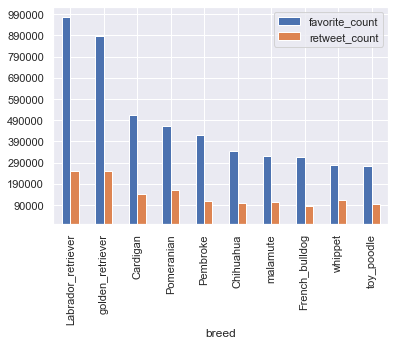

In [33]:
df = enhanced_twitter_archive.copy()# precaution incase I mess up and have to start again.

favourite_breeds = df.groupby('breed')[['favorite_count','retweet_count']].sum().sort_values(['favorite_count','retweet_count'], ascending=[False, False])

print(favourite_breeds.head(10))

favourite_breeds.head(10).plot( y = ['favorite_count','retweet_count'],kind = 'bar', yticks = range(90000, 1000000,100000))

We can check the amounts of likes and retweets for the different ratings.


                  favorite_count  retweet_count
rating_numerator                               
0                        20900.0         2755.0
1                          123.0           55.0
2                         5328.0         2363.0


<AxesSubplot:xlabel='rating_numerator'>

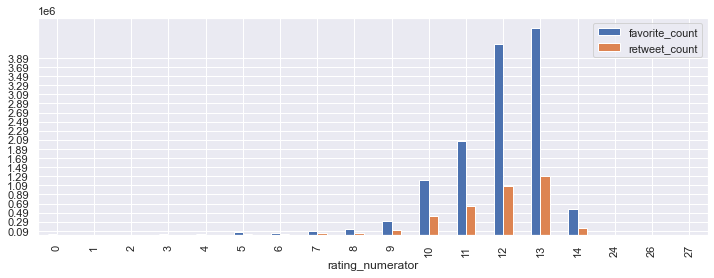

In [39]:
#group by rating_numerator and check for sum of likes and retweets

rating_dist = df.groupby('rating_numerator')[['favorite_count', 'retweet_count']].sum()
print(rating_dist.head(3))
rating_dist.plot(kind = 'bar', figsize=(12,4), yticks = range(90000, 4000000,200000))

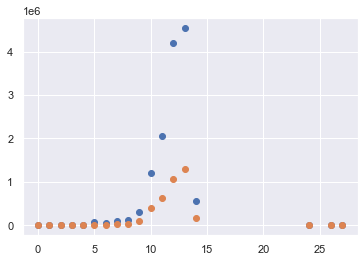

In [40]:
#create scatter plots for the both the likes and tweets columns
for column in rating_dist: 
    plt.scatter(x = rating_dist.index, y= rating_dist[f'{column}'])

We can also check the distribution of ratings over time

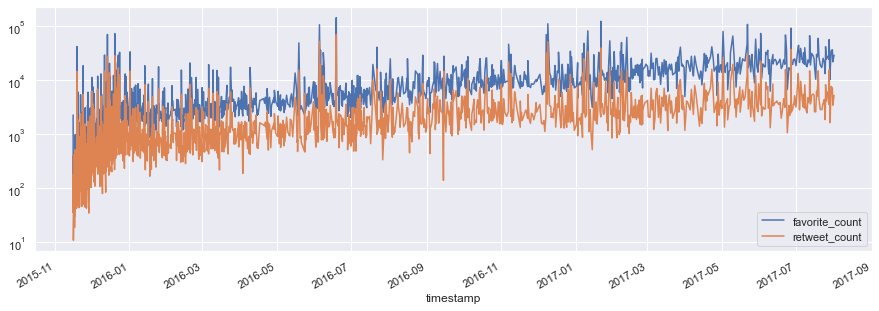

In [41]:
likes_trend = df.set_index('timestamp').sort_index()
likes_trend.plot(y=['favorite_count','retweet_count'], figsize=(15,5), logy=True);


### Insights:
1. Based on the sums of favourite and retweeted counts for each breed in our sample, the *Labrador* and *golden* retrievers take the day. 
> we have to note however that we have not looked at the distribution of tweets, where we may probably find that a few tweets contribute to most likes and retweets.


2. From our sample, there seems to be correlation between the *rating* and both the *favorite* and *retweet* counts

3. We can see that there are a few spikes here and there, but the tweets and retweets are rising albeit slowly over time.

### Visualization

Let us now go for the winner and losers, we want to display the dogs with the highest and lowest favourite count.

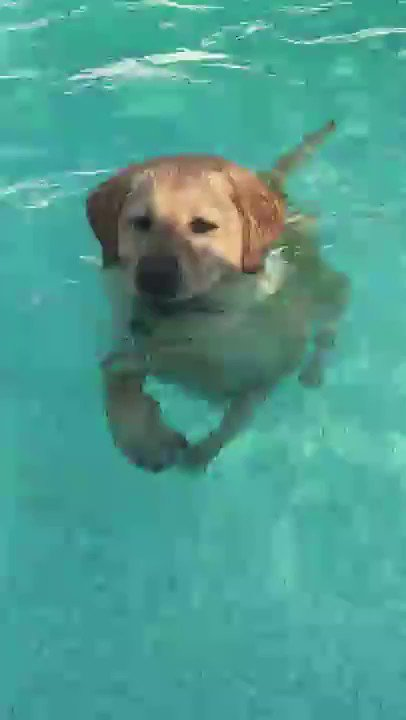

In [42]:
from IPython.display import Image

most_likes_url = df[df['favorite_count'] == df['favorite_count'].max()].jpg_url.iloc[0]
least_likes_url = df[df['favorite_count'] == df['favorite_count'].min()].jpg_url.iloc[0]

#Image for most liked
Image(most_likes_url, width=400, height=450)




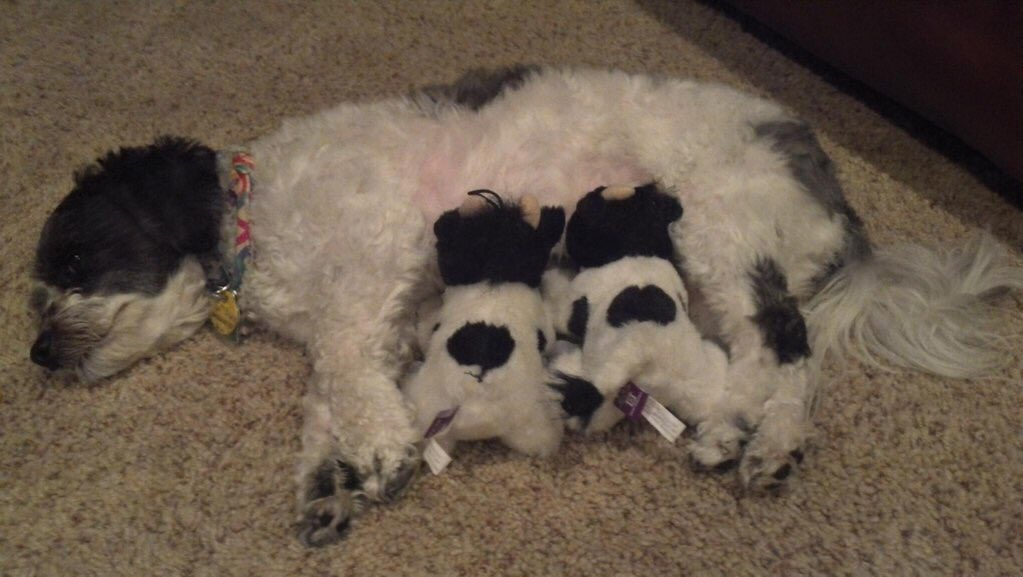

In [43]:
#Image for least likes
Image(least_likes_url, width = 400, height = 450 )